In [ ]:
!pip install matplotlib numpy TensorFlow tensorflow_hub

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as tf_hub
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [ ]:
def crop_center(image):
    shape = image.shape
    new_shape = min(shape[1], shape[2])
    offset_y = max(shape[1] - shape[2], 0) // 2
    offset_x = max(shape[2] - shape[1], 0) // 2
    cropped_image = tf.image.crop_to_bounding_box(image, offset_y, offset_x, new_shape, new_shape)
    return cropped_image

In [ ]:
def load_image(image_path, image_size=(256, 256), preserve_aspect_ratio=True):
    img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
    img = crop_center(img)
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

In [ ]:
def visualize(images, titles=('',)):
    n = len(images)
    image_sizes = [image.shape[1] for image in images]
    w = (image_sizes[0] * 6) // 320
    plt.figure(figsize=(w  * n, w))
    gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
    for i in range(n):
        plt.subplot(gs[i])
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')
        plt.title(titles[i] if len(titles) > i else '')
        plt.savefig("final.jpg")
    plt.show()

In [ ]:
style_image = "/content/merlin_152403333_3552f80f-9675-4951-bc32-0b8cbdbfa090-superJumbo.jpg"
content_image = "/content/sky.jpeg"
output_img_size = 512
content_img_size = (output_img_size, output_img_size)
style_img_size = (256, 256)
content_image = load_image(content_image, content_img_size)
style_image = load_image(style_image, style_img_size)


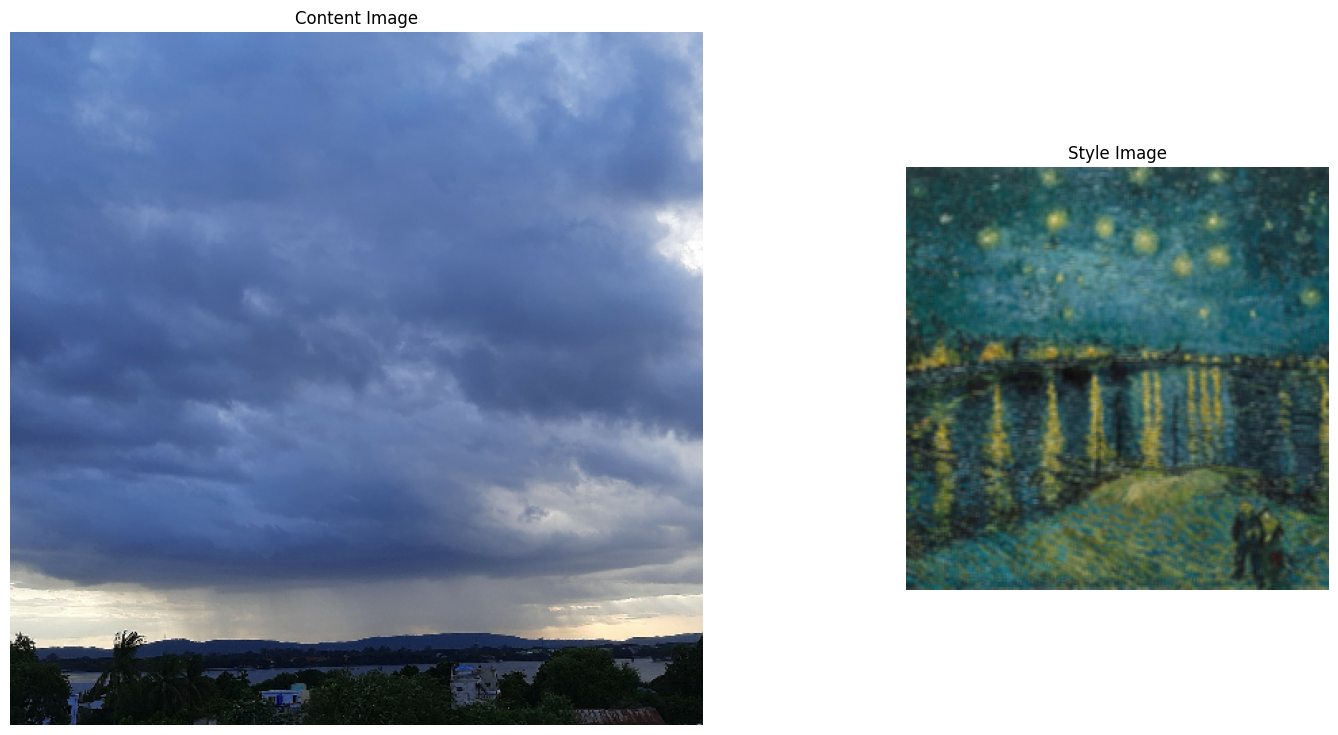

In [ ]:
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
visualize([content_image, style_image], ['Content Image', 'Style Image'])

In [ ]:
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = tf_hub.load(hub_handle)

In [ ]:
results = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = results[0]

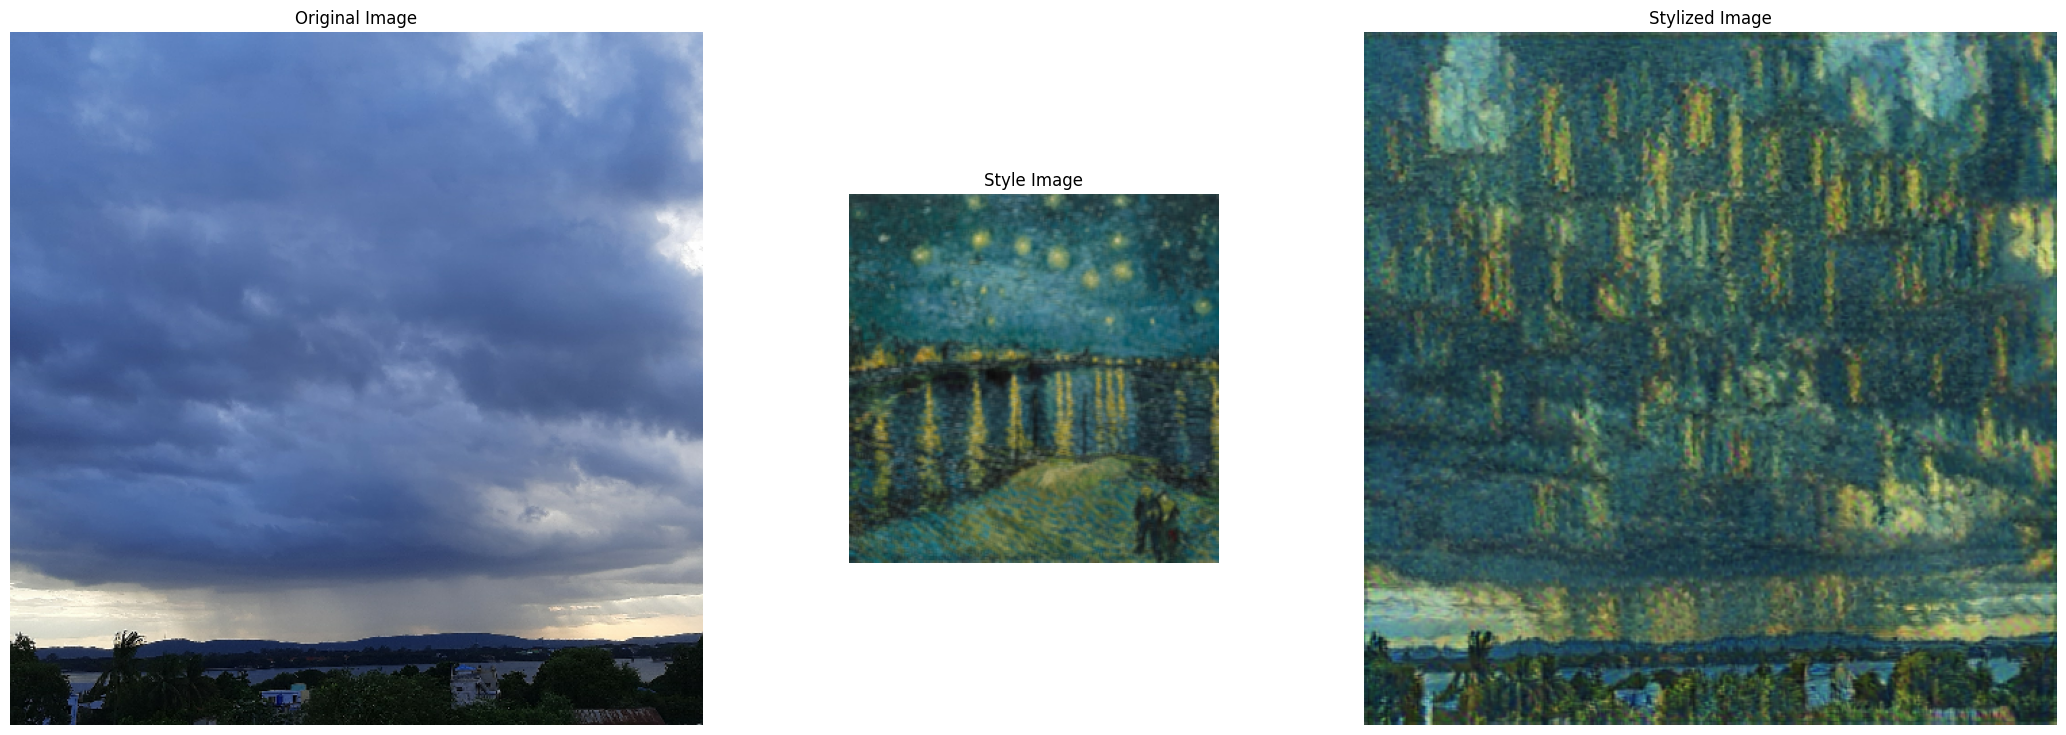

In [ ]:
visualize([content_image, style_image, stylized_image], titles=['Original Image', 'Style Image', 'Stylized Image'])


In [ ]:
content_image2 = ""
style_image2 = ""

results2 = hub_module(tf.constant(content_image2), tf.constant(style_image2))
stylized_image2 = results2[0]

visualize([content_image2, style_image2, stylized_image2], titles=['Original Image', 'Style Image', 'Stylized Image'])
